<a href="https://colab.research.google.com/github/Aneka16/GROUP13_CreditCardFraud/blob/main/Group13_CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Loading the dataset
df = pd.read_csv('creditcard.csv')
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df = df.drop(['Time'], axis=1)

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

In [14]:
# Train Isolation Forest(Unsupervised learning)
model = IsolationForest(contamination=0.001, random_state=42)
y_pred = model.fit_predict(X)
y_pred = [1 if i == -1 else 0 for i in y_pred]

In [9]:
print("Classification Report:")
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.37      0.21      0.27       492

    accuracy                           1.00    284807
   macro avg       0.68      0.61      0.63    284807
weighted avg       1.00      1.00      1.00    284807



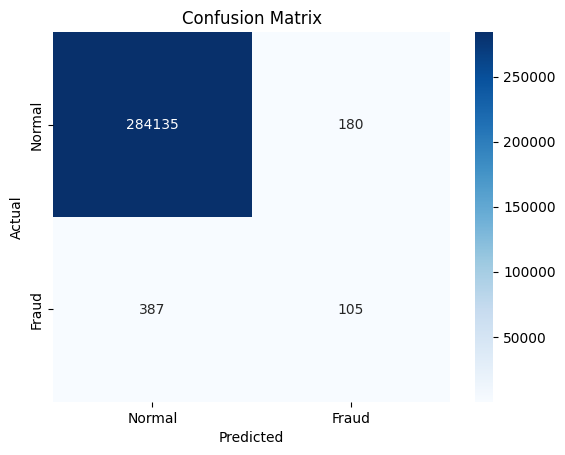

In [10]:
# Visual Confusion Matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

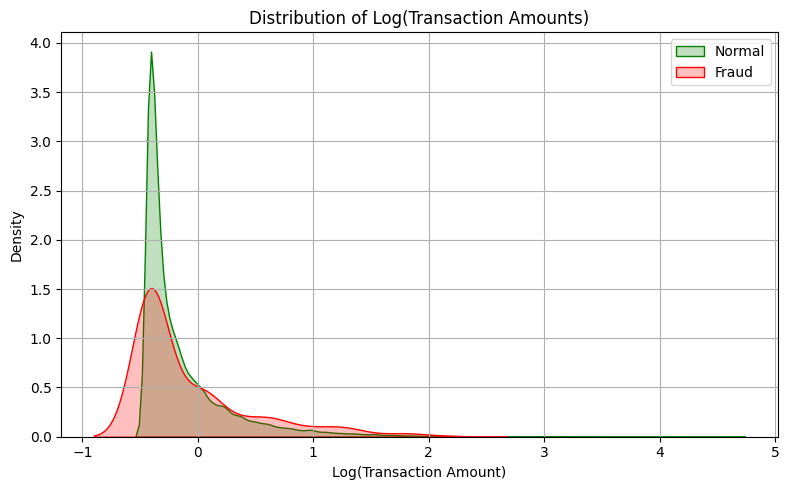

In [21]:
# Apply log transformation to Amount (add 1 to avoid log(0))
normal_log = np.log1p(normal['Amount'])
fraud_log = np.log1p(fraud['Amount'])

# Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(normal_log, label='Normal', fill=True, color='green')
sns.kdeplot(fraud_log, label='Fraud', fill=True, color='red')
plt.title('Distribution of Log(Transaction Amounts)')
plt.xlabel('Log(Transaction Amount)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
